In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dti
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('datasets/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [128]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [129]:
df = df.dropna()
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [130]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [132]:
df["date_added"] = pd.to_datetime(df['date_added'], errors='coerce')

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9.0,September,2021.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9.0,September,2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9.0,September,2021.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9.0,September,2021.0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,9.0,September,2021.0


### Categorias

In [133]:
df['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [134]:
df['rating'].nunique()

14

### Distribucion de catergorias

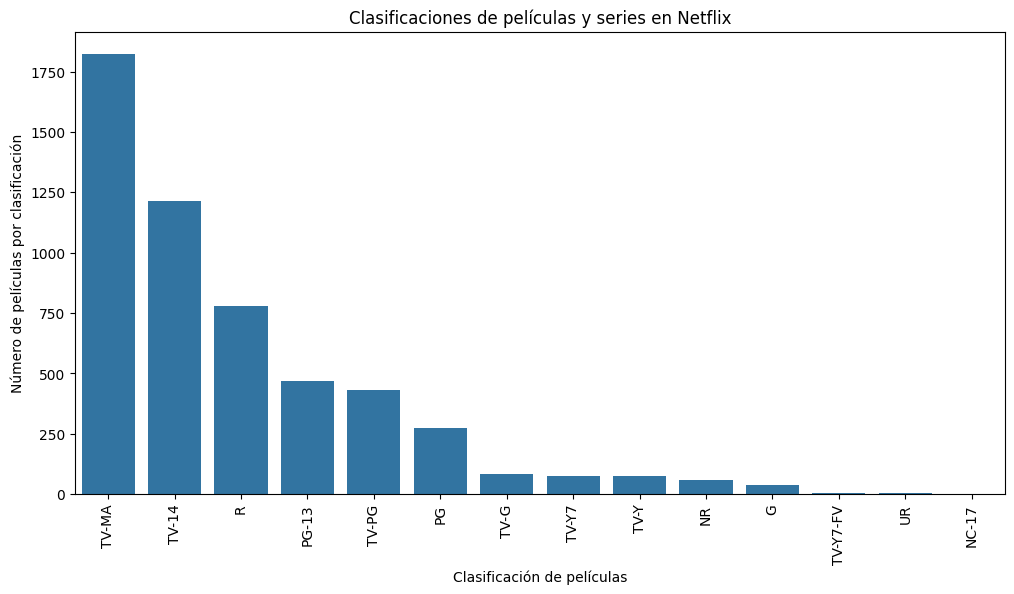

In [135]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df, order=rating_counts.index)

plt.title('Clasificaciones de películas y series en Netflix')
plt.xlabel('Clasificación de películas')
plt.ylabel('Número de películas por clasificación')

plt.xticks(rotation='vertical')

plt.show()

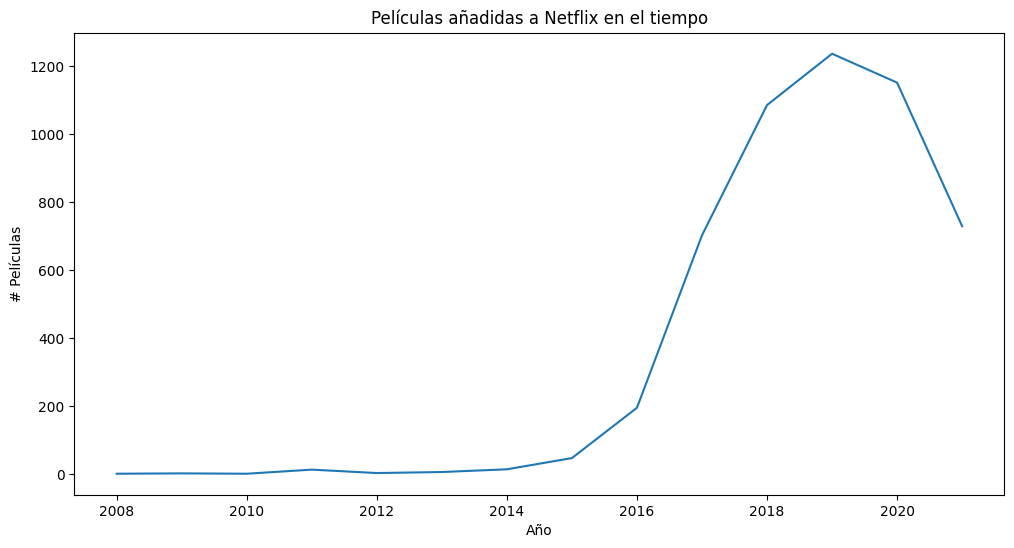

In [136]:
type1 = ['Movie']
df_movies = df[df['type'].isin(type1)]

movies_per_year = df_movies['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.lineplot(
    x=movies_per_year.index,
    y=movies_per_year.values
)

plt.title('Películas añadidas a Netflix en el tiempo')
plt.xlabel('Año')
plt.ylabel('# Películas')
plt.show()

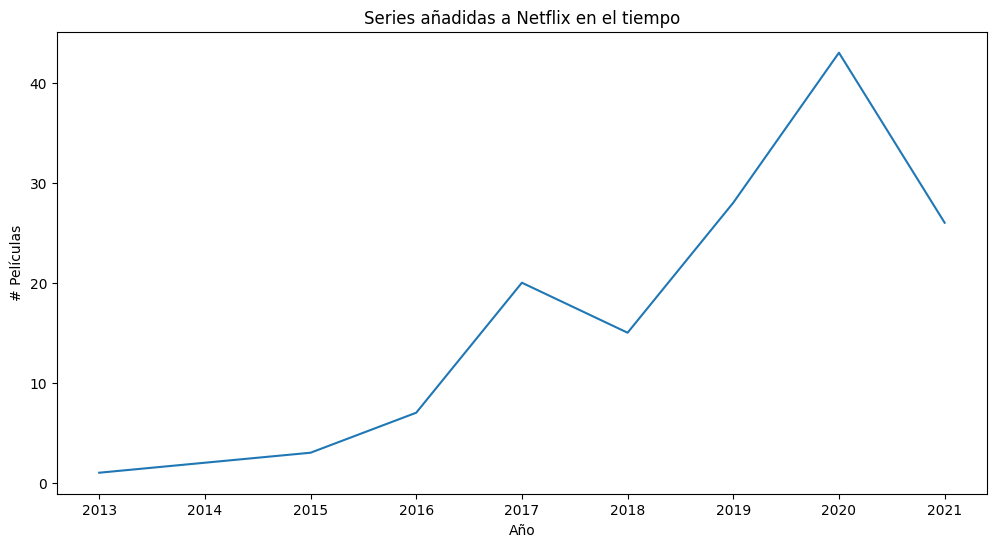

In [137]:
type2 = ['TV Show']
df_movies = df[df['type'].isin(type2)]


movies_per_year = df_movies['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.lineplot(
    x=movies_per_year.index,
    y=movies_per_year.values
)

plt.title('Series añadidas a Netflix en el tiempo')
plt.xlabel('Año')
plt.ylabel('# Películas')
plt.show()

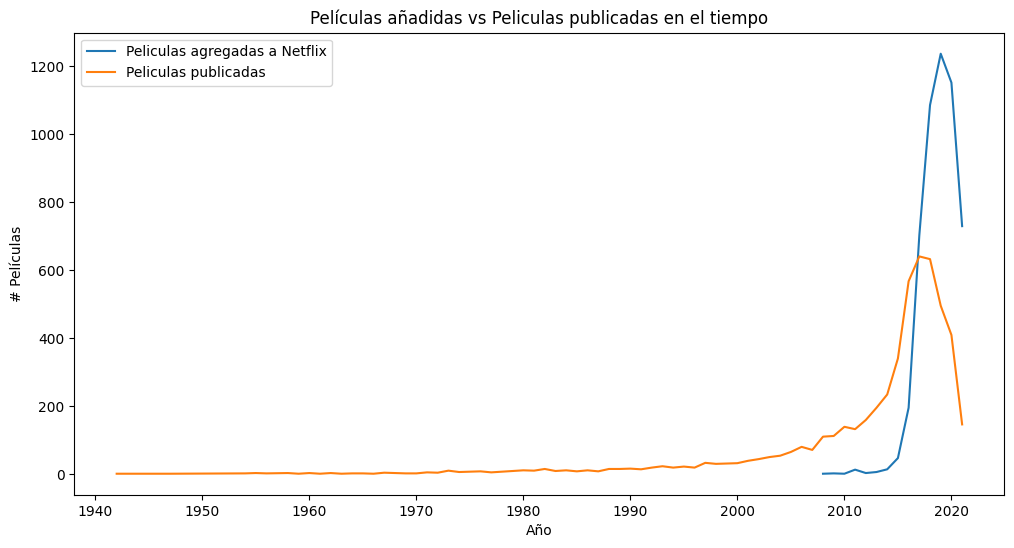

In [138]:
type1 = ['Movie']
df_movies = df[df['type'].isin(type1)]


movies_per_year = df_movies['year_added'].value_counts().sort_index()
movies_release_year = df_movies['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.lineplot(
    x=movies_per_year.index,
    y=movies_per_year.values,
    label='Peliculas agregadas a Netflix'
)

sns.lineplot(
    x=movies_release_year.index,
    y=movies_release_year.values,
    label='Peliculas publicadas'
)

plt.title('Películas añadidas vs Peliculas publicadas en el tiempo')
plt.xlabel('Año')
plt.ylabel('# Películas')
plt.show()

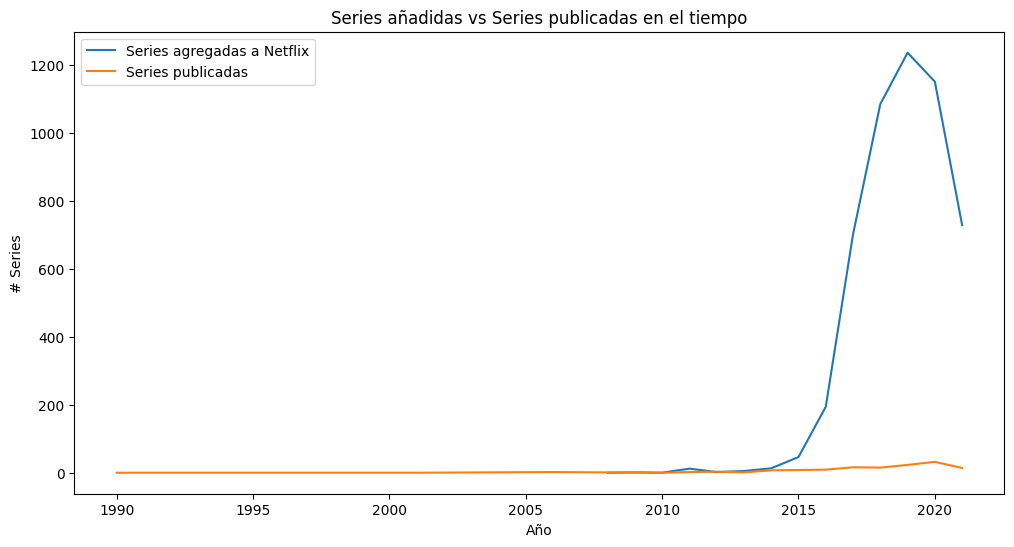

In [139]:
type2 = ['TV Show']
df_shows = df[df['type'].isin(type2)]


shows_per_year = df_movies['year_added'].value_counts().sort_index()
shows_release_year = df_shows['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.lineplot(
    x=shows_per_year.index,
    y=shows_per_year.values,
    label='Series agregadas a Netflix'
)

sns.lineplot(
    x=shows_release_year.index,
    y=shows_release_year.values,
    label='Series publicadas'
)

plt.title('Series añadidas vs Series publicadas en el tiempo')
plt.xlabel('Año')
plt.ylabel('# Series')
plt.show()

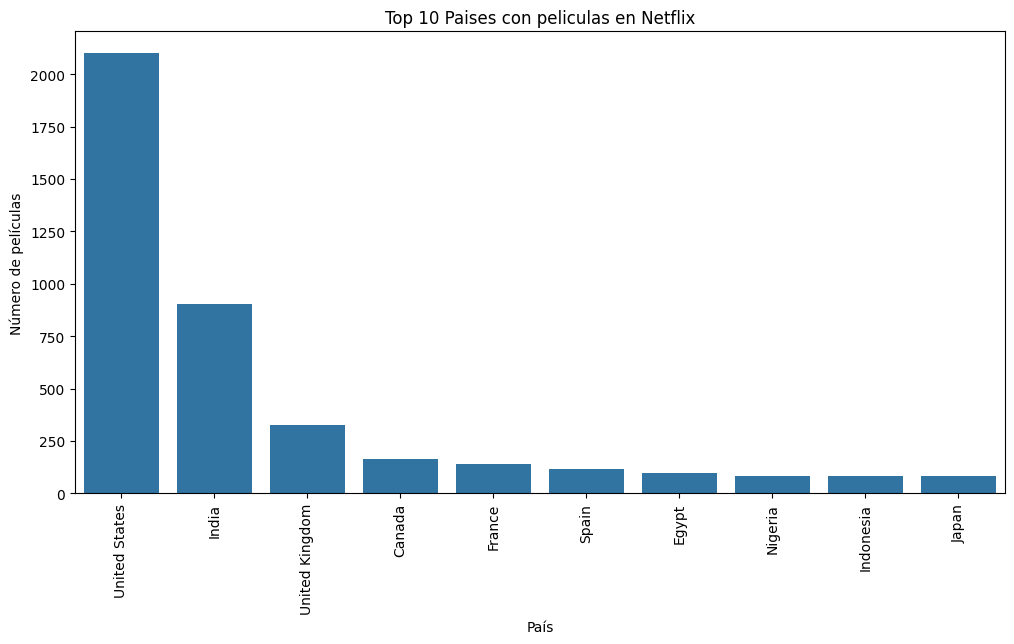

In [140]:
df_movies['first_country'] = df_movies['country'].apply(lambda x: x.split(",")[0])

country_counts = df_movies['first_country'].value_counts()[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)

plt.title('Top 10 Paises con peliculas en Netflix')
plt.xlabel('País')
plt.ylabel('Número de películas')

plt.xticks(rotation='vertical')

plt.show()

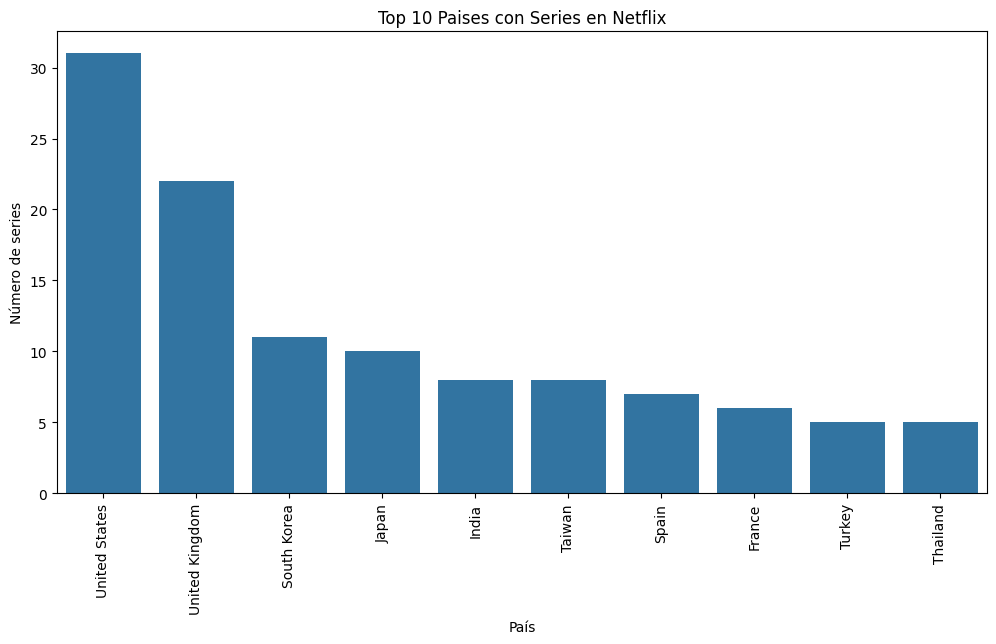

In [141]:
df_shows['first_country'] = df_shows['country'].apply(lambda x: x.split(",")[0])

country_counts = df_shows['first_country'].value_counts()[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)

plt.title('Top 10 Paises con Series en Netflix')
plt.xlabel('País')
plt.ylabel('Número de series')

plt.xticks(rotation='vertical')

plt.show()

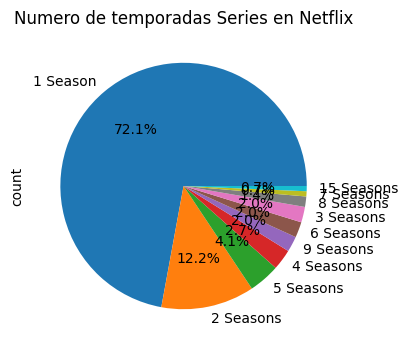

In [142]:
shows_duration = df_shows['duration'].value_counts()


shows_duration.plot(
    kind='pie', 
    autopct='%1.1f%%'
)
plt.title('Numero de temporadas Series en Netflix')
figure = plt.gcf()
figure.set_size_inches(4, 4)
plt.show()

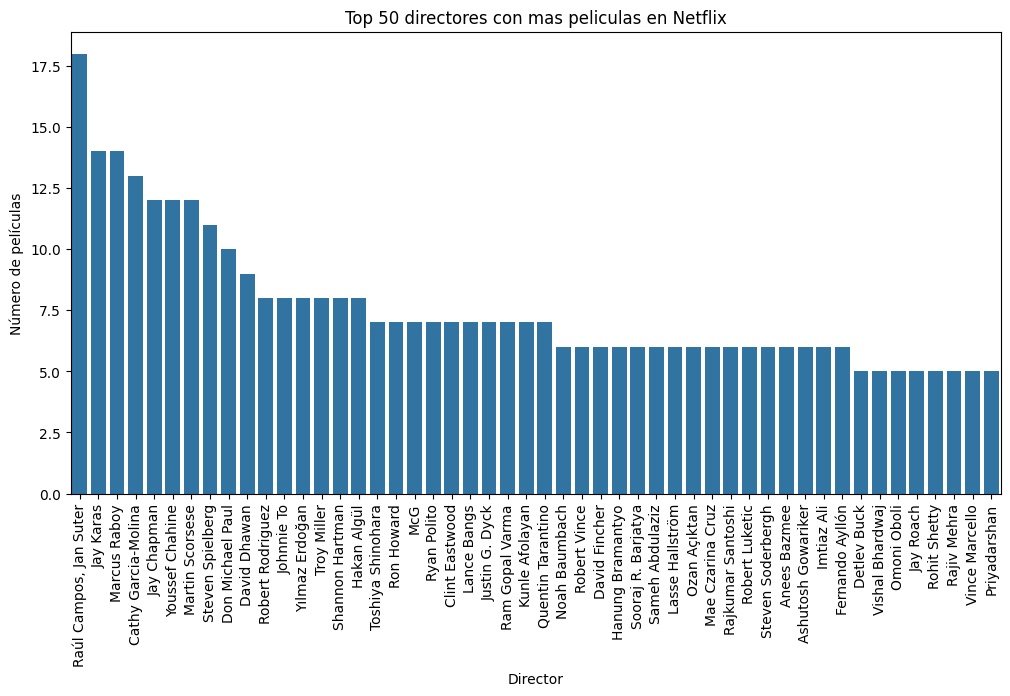

In [143]:
director_counts = df_movies['director'].value_counts()[:50]

plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.index, y=director_counts.values)

plt.title('Top 50 directores con mas peliculas en Netflix')
plt.xlabel('Director')
plt.ylabel('Número de películas')

plt.xticks(rotation='vertical')

plt.show()

In [144]:
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,first_country
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9.0,September,2021.0,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9.0,September,2021.0,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9.0,September,2021.0,Germany
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,9.0,September,2021.0,India
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,9.0,September,2021.0,United States


In [145]:
df_movies['duration'] = df_movies['duration'].astype(str)
df_movies['duration_numeric'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           5332 non-null   object        
 1   type              5332 non-null   object        
 2   title             5332 non-null   object        
 3   director          5332 non-null   object        
 4   cast              5332 non-null   object        
 5   country           5332 non-null   object        
 6   date_added        5328 non-null   datetime64[ns]
 7   release_year      5332 non-null   int64         
 8   rating            5332 non-null   object        
 9   duration          5332 non-null   object        
 10  listed_in         5332 non-null   object        
 11  description       5332 non-null   object        
 12  month_added       5328 non-null   float64       
 13  month_name_added  5328 non-null   object        
 14  year_added        5328 non-nu

In [146]:
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,first_country,duration_numeric
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9.0,September,2021.0,United States,125.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9.0,September,2021.0,United States,104.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9.0,September,2021.0,Germany,127.0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,9.0,September,2021.0,India,166.0
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,9.0,September,2021.0,United States,103.0


In [147]:
df_movies.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
month_added                float64
month_name_added            object
year_added                 float64
first_country               object
duration_numeric           float64
dtype: object

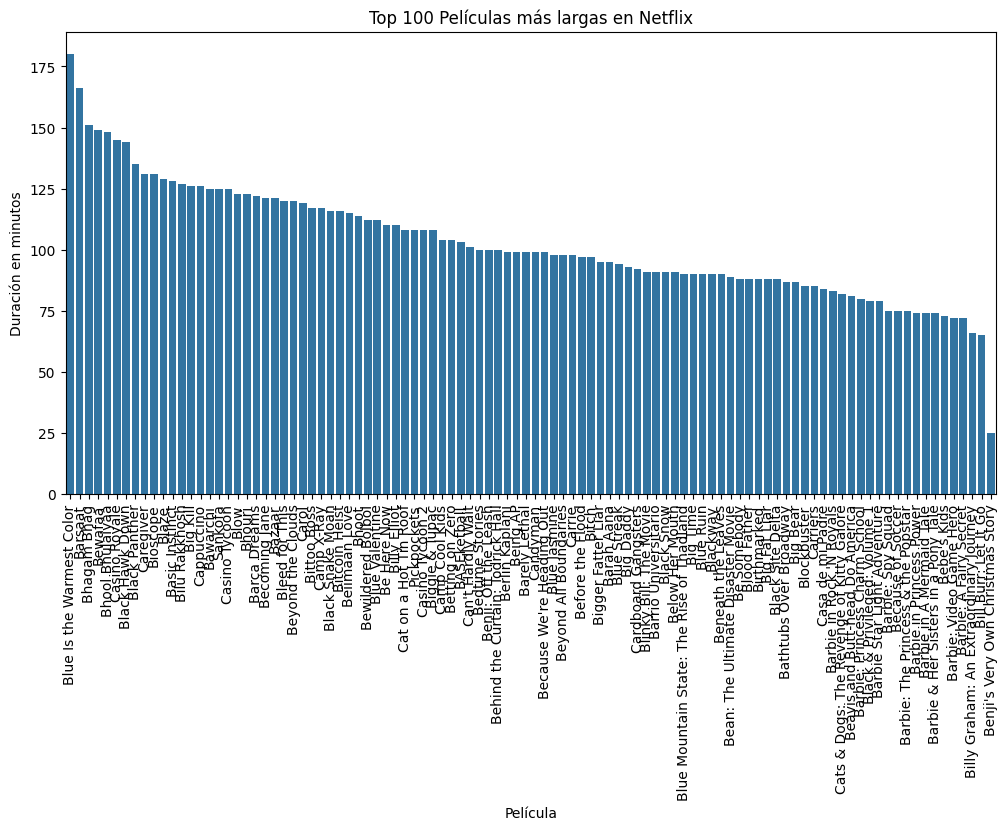

In [148]:
top_movies = df_movies['title'].value_counts()[:100].index
sorted_movies = df_movies[df_movies['title'].isin(top_movies)].sort_values(by='duration_numeric', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_movies['title'], y=sorted_movies['duration_numeric'])

plt.title('Top 100 Películas más largas en Netflix')
plt.xlabel('Película')
plt.ylabel('Duración en minutos')

plt.xticks(rotation='vertical')

plt.show()